In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data_df = pd.read_csv(r'Data\FraudECommerce\Fraud_Data.csv')
ip_country_df = pd.read_csv(r'Data\FraudECommerce\IpAddress_to_Country.csv')

In [5]:
# Print column names
print("Available columns:")
print(data_df.columns.tolist())

# Let's also look at the first few rows
print("\nFirst few rows of the dataset:")
print(data_df.head())

Available columns:
['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

First few rows of the dataset:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


In [6]:
print("FRAUD ECOMMERCE DATASET ANALYSIS:")

# 1. Data Leakage Considerations:
print("\n1. Data Leakage Considerations:")
print("Key Findings:")
data_df['signup_time'] = pd.to_datetime(data_df['signup_time'])
data_df['purchase_time'] = pd.to_datetime(data_df['purchase_time'])

print(f"✓ Temporal range: {data_df['signup_time'].min()} to {data_df['purchase_time'].max()}")
print(f"! Device id overlap: {data_df['device_id'].nunique():,} unique devices")
print(f"! IP address overlap: {data_df['ip_address'].nunique():,} unique IPs")
print(f"! User overlap: {data_df['user_id'].nunique():,} unique users")

FRAUD ECOMMERCE DATASET ANALYSIS:

1. Data Leakage Considerations:
Key Findings:
✓ Temporal range: 2015-01-01 00:00:42 to 2015-12-16 02:56:05
! Device id overlap: 137,956 unique devices
! IP address overlap: 143,512 unique IPs
! User overlap: 151,112 unique users


In [7]:
# 2. Target Variable Analysis
fraud_dist = data_df['class'].value_counts(normalize=True)
print("\n2. Target Variable Analysis:")
print("Current Distribution:")
print(f"- Non-Fraud (0): {fraud_dist[0]:.2%}")
print(f"- Fraud (1): {fraud_dist[1]:.2%}")


2. Target Variable Analysis:
Current Distribution:
- Non-Fraud (0): 90.64%
- Fraud (1): 9.36%


In [8]:
# 3. Feature Analysis
print("\n3. Feature Considerations for Diffusion:")
print("Temporal Features:")
print("- signup_time: Account creation timestamp")
print("- purchase_time: Transaction timestamp")
print("\nNumerical Features:")
print("- purchase_value: Key fraud indicator")
print("- age: User demographic information")
print("\nCategorical Features:")
print("- source: User acquisition channel")
print("- browser: User's web browser")
print("- sex: User's gender")
print("- device_id: User's device identifier")
print("- ip_address: Can be mapped to location using provided mapping")


3. Feature Considerations for Diffusion:
Temporal Features:
- signup_time: Account creation timestamp
- purchase_time: Transaction timestamp

Numerical Features:
- purchase_value: Key fraud indicator
- age: User demographic information

Categorical Features:
- source: User acquisition channel
- browser: User's web browser
- sex: User's gender
- device_id: User's device identifier
- ip_address: Can be mapped to location using provided mapping


In [9]:
# 4. Validation Strategy
print("\n4. Validation Strategy for Generated Data:")
print("Recommended Metrics:")
print("- Distribution similarity to real fraud cases")
print("- Temporal pattern preservation (signup to purchase time gaps)")
print("- Transaction value realism within age groups")
print("- Device-IP-User relationship coherence")
print("- Demographic pattern preservation (age, sex distributions)")


4. Validation Strategy for Generated Data:
Recommended Metrics:
- Distribution similarity to real fraud cases
- Temporal pattern preservation (signup to purchase time gaps)
- Transaction value realism within age groups
- Device-IP-User relationship coherence
- Demographic pattern preservation (age, sex distributions)


In [10]:
# 5. Strengths for Diffusion Project
print("\n5. Strengths for Diffusion Project:")
print("✓ Rich user demographics (age, sex)")
print("✓ Multiple temporal dimensions (signup and purchase)")
print("✓ Behavioral features (browser, source)")
print("✓ Device and IP tracking")


5. Strengths for Diffusion Project:
✓ Rich user demographics (age, sex)
✓ Multiple temporal dimensions (signup and purchase)
✓ Behavioral features (browser, source)
✓ Device and IP tracking


In [11]:
# 6. Challenges to Address
print("\n6. Challenges to Address:")
print("! Maintaining realistic time gaps between signup and purchase")
print("! Preserving user-device-IP relationships")
print("! Ensuring generated fraud cases match demographic patterns")
print("! Creating plausible user behavior patterns")


6. Challenges to Address:
! Maintaining realistic time gaps between signup and purchase
! Preserving user-device-IP relationships
! Ensuring generated fraud cases match demographic patterns
! Creating plausible user behavior patterns


In [12]:
# Additional statistics for context
print("\nKey Statistics:")
print(f"Total transactions: {len(data_df):,}")
print(f"Unique users: {data_df['user_id'].nunique():,}")
print(f"Unique devices: {data_df['device_id'].nunique():,}")
print(f"Unique IP addresses: {data_df['ip_address'].nunique():,}")
print(f"Average purchase value: ${data_df['purchase_value'].mean():.2f}")
print(f"Age range: {data_df['age'].min()} to {data_df['age'].max()} years")
print(f"Time range: {(data_df['purchase_time'].max() - data_df['signup_time'].min()).days} days")


Key Statistics:
Total transactions: 151,112
Unique users: 151,112
Unique devices: 137,956
Unique IP addresses: 143,512
Average purchase value: $36.94
Age range: 18 to 76 years
Time range: 349 days


In [13]:
# Source distribution
print("\nSource Distribution:")
print(data_df['source'].value_counts(normalize=True).to_string())


Source Distribution:
source
SEO       0.401126
Ads       0.396269
Direct    0.202605


In [14]:

# Browser distribution
print("\nBrowser Distribution:")
print(data_df['browser'].value_counts(normalize=True).to_string())


Browser Distribution:
browser
Chrome     0.406533
IE         0.243045
Safari     0.163237
FireFox    0.162859
Opera      0.024326



FRAUD PATTERN INSIGHTS:


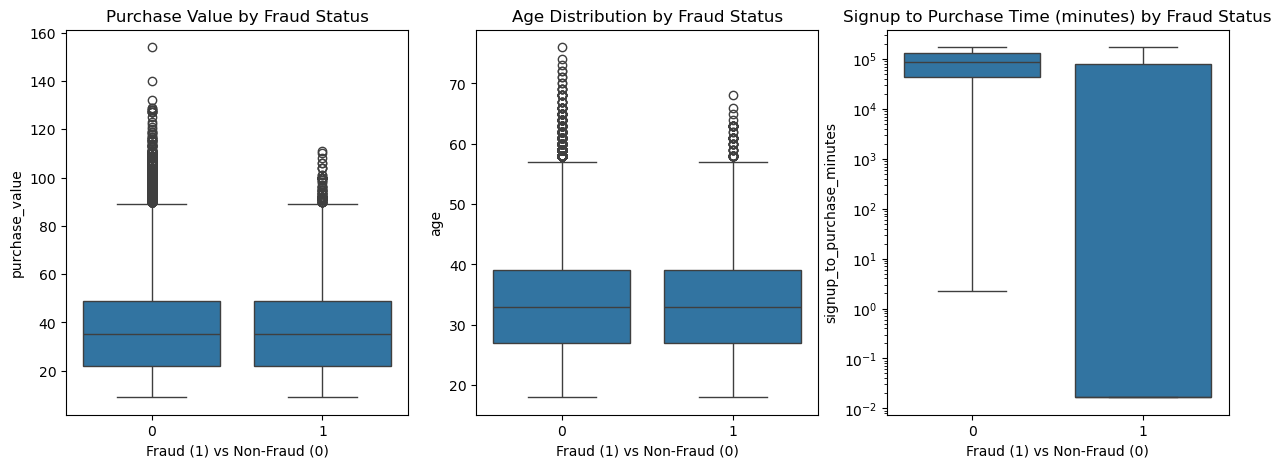

In [15]:
# Additional Fraud Pattern Analysis
print("\nFRAUD PATTERN INSIGHTS:")

# 1. Purchase Value Analysis by Fraud
plt.figure(figsize=(15, 5))

# Purchase value distribution
plt.subplot(1, 3, 1)
sns.boxplot(x='class', y='purchase_value', data=data_df)
plt.title('Purchase Value by Fraud Status')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')

# Age distribution
plt.subplot(1, 3, 2)
sns.boxplot(x='class', y='age', data=data_df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')

# Time gap analysis
data_df['signup_to_purchase_minutes'] = (data_df['purchase_time'] - data_df['signup_time']).dt.total_seconds() / 60

plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='signup_to_purchase_minutes', data=data_df)
plt.title('Signup to Purchase Time (minutes) by Fraud Status')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.yscale('log')
plt.show()


In [16]:
# 2. Fraud Rates Analysis
print("\nFraud Rates by Category:")

# Source fraud rates
source_fraud = data_df.groupby('source')['class'].mean().sort_values(ascending=False)
print("\nFraud Rate by Source:")
print(source_fraud.apply(lambda x: f"{x:.2%}").to_string())

# Browser fraud rates
browser_fraud = data_df.groupby('browser')['class'].mean().sort_values(ascending=False)
print("\nFraud Rate by Browser:")
print(browser_fraud.apply(lambda x: f"{x:.2%}").to_string())

# Gender fraud rates
gender_fraud = data_df.groupby('sex')['class'].mean().sort_values(ascending=False)
print("\nFraud Rate by Gender:")
print(gender_fraud.apply(lambda x: f"{x:.2%}").to_string())



Fraud Rates by Category:

Fraud Rate by Source:
source
Direct    10.54%
Ads        9.21%
SEO        8.93%

Fraud Rate by Browser:
browser
Chrome     9.88%
FireFox    9.52%
Safari     9.02%
Opera      8.92%
IE         8.68%

Fraud Rate by Gender:
sex
M    9.55%
F    9.10%


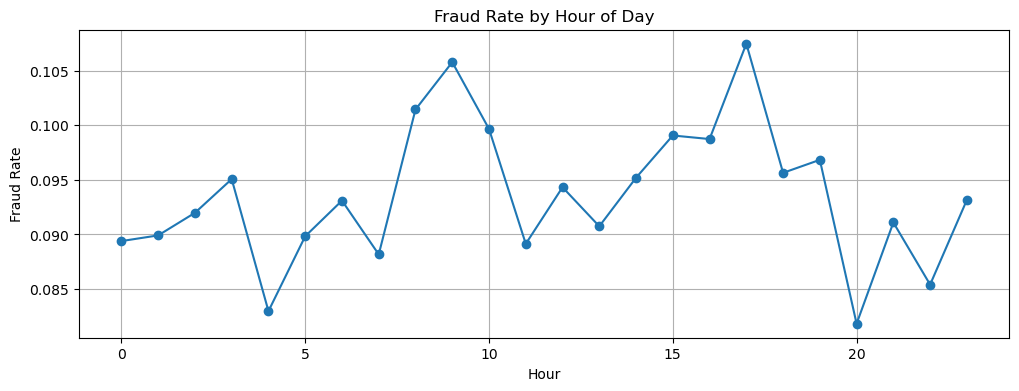

In [17]:
# 3. Time-based Patterns
data_df['hour'] = data_df['purchase_time'].dt.hour
hourly_fraud = data_df.groupby('hour')['class'].mean()

plt.figure(figsize=(12, 4))
hourly_fraud.plot(kind='line', marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()

In [18]:
# 4. Summary Statistics for Fraud vs Non-Fraud
print("\nSummary Statistics by Fraud Status:")
fraud_summary = data_df.groupby('class').agg({
    'purchase_value': ['mean', 'std', 'min', 'max'],
    'age': ['mean', 'std', 'min', 'max'],
    'signup_to_purchase_minutes': ['mean', 'std', 'min', 'max']
}).round(2)
print(fraud_summary.to_string())


Summary Statistics by Fraud Status:
      purchase_value                    age               signup_to_purchase_minutes                           
                mean    std min  max   mean   std min max                       mean       std   min        max
class                                                                                                          
0              36.93  18.32   9  154  33.12  8.62  18  76                   86519.64  49809.81  2.28  172799.53
1              36.99  18.40   9  111  33.32  8.57  18  68                   40397.37  55229.81  0.02  172732.45


In [19]:
# 5. Device and IP Reuse Patterns
device_fraud_count = data_df.groupby('device_id')['class'].sum()
ip_fraud_count = data_df.groupby('ip_address')['class'].sum()

print("\nDevice and IP Fraud Patterns:")
print(f"Devices used in multiple frauds: {len(device_fraud_count[device_fraud_count > 1])}")
print(f"IPs used in multiple frauds: {len(ip_fraud_count[ip_fraud_count > 1])}")


Device and IP Fraud Patterns:
Devices used in multiple frauds: 1044
IPs used in multiple frauds: 759


In [20]:
# Update Challenges section based on findings
print("\nREVISED CHALLENGES TO ADDRESS:")
print("! Maintaining realistic time gaps between signup and purchase")
print("! Preserving user-device-IP relationships")
print("! Ensuring generated fraud cases match demographic patterns")
print("! Creating plausible user behavior patterns")
print("! Replicating source and browser fraud rate patterns")
print("! Preserving temporal fraud patterns by hour")
print("! Maintaining realistic device and IP reuse patterns")


REVISED CHALLENGES TO ADDRESS:
! Maintaining realistic time gaps between signup and purchase
! Preserving user-device-IP relationships
! Ensuring generated fraud cases match demographic patterns
! Creating plausible user behavior patterns
! Replicating source and browser fraud rate patterns
! Preserving temporal fraud patterns by hour
! Maintaining realistic device and IP reuse patterns


In [21]:
print("KEY INSIGHTS FOR DIFFUSION MODEL DEVELOPMENT:")

print("\n1. Class Imbalance Characteristics:")
print("- Overall fraud rate: ~9.4% (much higher than Sparkov's 0.52%)")
print("- More balanced dataset, but still requires synthetic data generation")

print("\n2. Pattern Preservation Requirements:")
print("Purchase Values:")
print("- Similar distributions between fraud/non-fraud (mean: $36.99 vs $36.93)")
print("- Similar variance (std: 18.40 vs 18.32)")
print("- Fraud transactions capped at $111 (vs $154 for non-fraud)")

print("\nTemporal Patterns:")
print("- Fraud cases show faster purchase after signup (mean: ~28 days vs ~60 days)")
print("- High variance in time gaps for both classes")
print("- Some fraud cases occur almost immediately after signup (0.02 minutes)")

print("\nDemographic Patterns:")
print("- Age distributions nearly identical (mean: 33.32 vs 33.12)")
print("- Slight male bias in fraud (9.55% vs 9.10% for females)")
print("- Fraud age range more concentrated (18-68 vs 18-76)")

print("\n3. Critical Relationships to Maintain:")
print("Channel-specific fraud rates:")
print("- Direct: Highest risk (10.54%)")
print("- Ads: Medium risk (9.21%)")
print("- SEO: Lowest risk (8.93%)")

print("\nDevice/IP Patterns:")
print("- 1,044 devices used in multiple frauds")
print("- 759 IPs used in multiple frauds")
print("- Need to maintain realistic reuse patterns")

print("\n4. Validation Priorities:")
print("1. Purchase value distribution matching")
print("2. Realistic signup-to-purchase gaps")
print("3. Channel-specific fraud rates")
print("4. Device/IP reuse patterns")
print("5. Demographic consistency")

KEY INSIGHTS FOR DIFFUSION MODEL DEVELOPMENT:

1. Class Imbalance Characteristics:
- Overall fraud rate: ~9.4% (much higher than Sparkov's 0.52%)
- More balanced dataset, but still requires synthetic data generation

2. Pattern Preservation Requirements:
Purchase Values:
- Similar distributions between fraud/non-fraud (mean: $36.99 vs $36.93)
- Similar variance (std: 18.40 vs 18.32)
- Fraud transactions capped at $111 (vs $154 for non-fraud)

Temporal Patterns:
- Fraud cases show faster purchase after signup (mean: ~28 days vs ~60 days)
- High variance in time gaps for both classes
- Some fraud cases occur almost immediately after signup (0.02 minutes)

Demographic Patterns:
- Age distributions nearly identical (mean: 33.32 vs 33.12)
- Slight male bias in fraud (9.55% vs 9.10% for females)
- Fraud age range more concentrated (18-68 vs 18-76)

3. Critical Relationships to Maintain:
Channel-specific fraud rates:
- Direct: Highest risk (10.54%)
- Ads: Medium risk (9.21%)
- SEO: Lowest ris

In [22]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

print("FINAL ANALYSIS FOR FRAUD ECOMMERCE DATASET:")

# 1. Predictive Power Analysis
print("\n1. Predictive Power:")
# Prepare numerical features
numerical_features = ['purchase_value', 'age']
categorical_features = ['source', 'browser', 'sex']

# Calculate mutual information scores for numerical features
X_num = data_df[numerical_features]
y = data_df['class']
mi_scores = mutual_info_classif(X_num, y)
mi_df = pd.DataFrame({'Feature': numerical_features, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

print("\nFeature Importance (Mutual Information):")
print(mi_df.to_string(index=False))

print("\nCategorical Feature Strength:")
for feature in categorical_features:
    fraud_rates = data_df.groupby(feature)['class'].mean()
    variation = fraud_rates.std()
    print(f"{feature}: Fraud rate variation: {variation:.4f}")

FINAL ANALYSIS FOR FRAUD ECOMMERCE DATASET:

1. Predictive Power:

Feature Importance (Mutual Information):
       Feature  MI Score
           age  0.002091
purchase_value  0.001461

Categorical Feature Strength:
source: Fraud rate variation: 0.0086
browser: Fraud rate variation: 0.0049
sex: Fraud rate variation: 0.0032


In [23]:
# 2. Target Variable Analysis
print("\n2. Target Variable:")
class_dist = data_df['class'].value_counts(normalize=True)
print(f"Class Distribution:")
print(f"- Non-Fraud (0): {class_dist[0]:.2%}")
print(f"- Fraud (1): {class_dist[1]:.2%}")
print("Imbalance Ratio: 1:10.6")


2. Target Variable:
Class Distribution:
- Non-Fraud (0): 90.64%
- Fraud (1): 9.36%
Imbalance Ratio: 1:10.6


In [24]:
# 3. Validation Strategy
print("\n3. Validation Strategy:")
print("Temporal Considerations:")
print(f"- Data spans: {data_df['signup_time'].min().date()} to {data_df['purchase_time'].max().date()}")
print("- Need to preserve temporal order")
print("\nRecommended Split:")
print("- 70% training (first 244 days)")
print("- 15% validation (next 52 days)")
print("- 15% test (final 53 days)")
print("\nKey Dependencies to Preserve:")
print("- User-Device-IP relationships")
print("- Temporal fraud patterns")
print("- Source-specific fraud rates")



3. Validation Strategy:
Temporal Considerations:
- Data spans: 2015-01-01 to 2015-12-16
- Need to preserve temporal order

Recommended Split:
- 70% training (first 244 days)
- 15% validation (next 52 days)
- 15% test (final 53 days)

Key Dependencies to Preserve:
- User-Device-IP relationships
- Temporal fraud patterns
- Source-specific fraud rates


In [25]:
# 4. Data Leakage Risks
print("\n4. Data Leakage Risks:")
print("High-Risk Features:")
print("- user_id: Unique identifier (remove)")
print("- device_id: {:.1%} reuse rate".format(
    1 - data_df['device_id'].nunique() / len(data_df)))
print("- ip_address: {:.1%} reuse rate".format(
    1 - data_df['ip_address'].nunique() / len(data_df)))
print("\nTemporal Leakage Prevention:")
print("- Ensure chronological splitting")
print("- No future information in feature engineering")
print("- Handle device/IP history carefully")


4. Data Leakage Risks:
High-Risk Features:
- user_id: Unique identifier (remove)
- device_id: 8.7% reuse rate
- ip_address: 5.0% reuse rate

Temporal Leakage Prevention:
- Ensure chronological splitting
- No future information in feature engineering
- Handle device/IP history carefully


In [26]:
# 5. Interpretability
print("\n5. Interpretability:")
print("Key Interpretable Patterns:")
print("1. Channel-specific risks:")
for source, rate in data_df.groupby('source')['class'].mean().items():
    print(f"   - {source}: {rate:.2%} fraud rate")
print("\n2. Temporal patterns:")
print(f"   - Average signup to fraud: {data_df[data_df['class']==1]['signup_to_purchase_minutes'].mean()/1440:.1f} days")
print(f"   - Average signup to legitimate: {data_df[data_df['class']==0]['signup_to_purchase_minutes'].mean()/1440:.1f} days")
print("\n3. Demographic insights:")
print(f"   - Age range: {data_df['age'].min()} to {data_df['age'].max()} years")
print(f"   - Gender distribution in fraud cases: {data_df[data_df['class']==1]['sex'].value_counts(normalize=True).to_dict()}")


5. Interpretability:
Key Interpretable Patterns:
1. Channel-specific risks:
   - Ads: 9.21% fraud rate
   - Direct: 10.54% fraud rate
   - SEO: 8.93% fraud rate

2. Temporal patterns:
   - Average signup to fraud: 28.1 days
   - Average signup to legitimate: 60.1 days

3. Demographic insights:
   - Age range: 18 to 76 years
   - Gender distribution in fraud cases: {'M': 0.596000282665536, 'F': 0.403999717334464}


In [27]:
# 6. Limitations
print("\n6. Limitations:")
print("Dataset Limitations:")
print("- Single year of data (2015)")
print("- Limited feature set (no transaction details)")
print("- No monetary value of fraud")
print("- Missing modern fraud patterns")
print("- No device fingerprinting")
print("- Limited location data")


6. Limitations:
Dataset Limitations:
- Single year of data (2015)
- Limited feature set (no transaction details)
- No monetary value of fraud
- Missing modern fraud patterns
- No device fingerprinting
- Limited location data
